# EJEMPLO MAS DETALLADO 

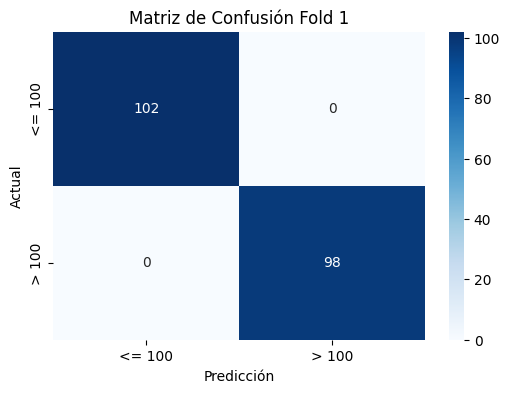

Fold 1:
Matriz de Confusión:
[[102   0]
 [  0  98]]
Precisión: 1.00



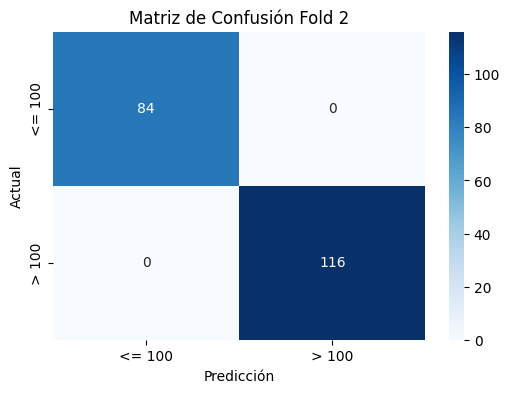

Fold 2:
Matriz de Confusión:
[[ 84   0]
 [  0 116]]
Precisión: 1.00



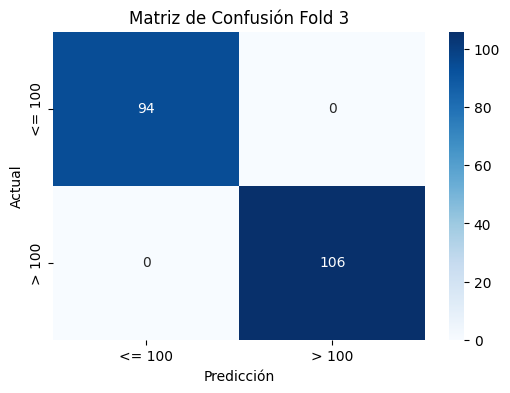

Fold 3:
Matriz de Confusión:
[[ 94   0]
 [  0 106]]
Precisión: 1.00



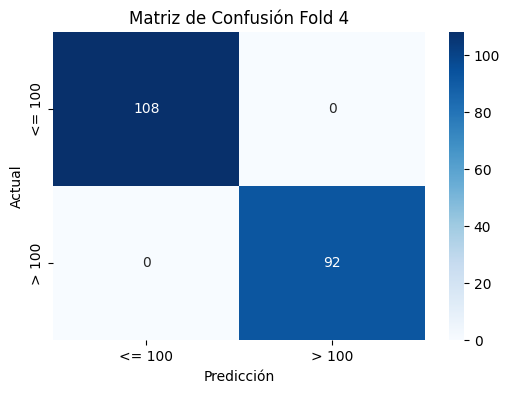

Fold 4:
Matriz de Confusión:
[[108   0]
 [  0  92]]
Precisión: 1.00



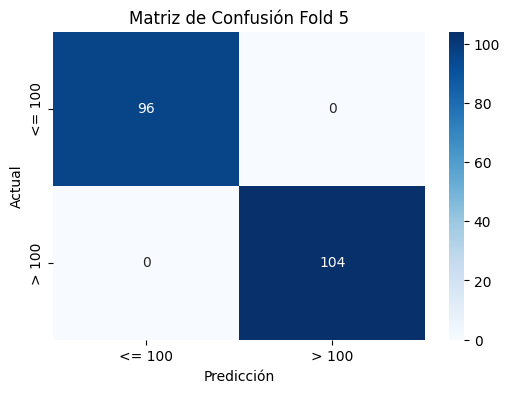

Fold 5:
Matriz de Confusión:
[[ 96   0]
 [  0 104]]
Precisión: 1.00



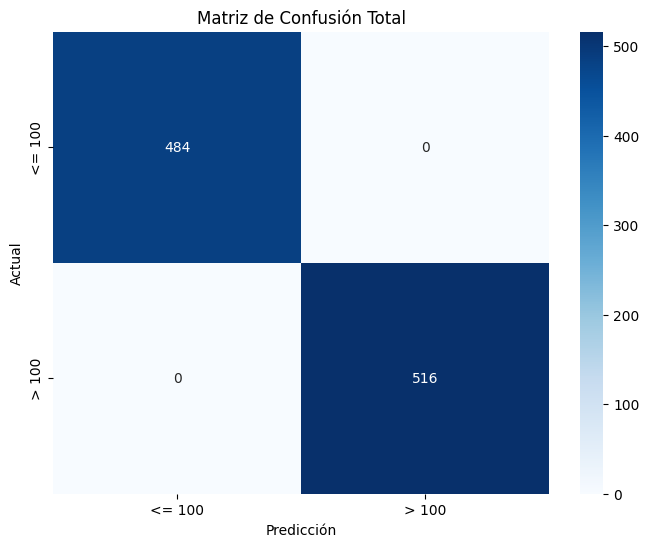

Precisión promedio del modelo: 1.00


In [16]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Cargar los datos desde un archivo Excel
# Asegúrate de que el archivo 'datos.xlsx' esté en la misma carpeta que este script o proporciona la ruta completa
df = pd.read_excel('datos - Variantes.xlsx')

# Definir características (X) y la variable objetivo (y)
X = df[['Ingresos', 'Edad', 'Historia_credito']]
y = np.where(df['Deuda'] > 100, 1, 0)  # Clasificación: 1 si deuda > 100, 0 si deuda <= 100

# Inicializar KFold con 5 divisiones
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestClassifier(random_state=42)

# Inicializar una matriz de confusión global
conf_matrix_sum = np.zeros((2, 2), dtype=int)
accuracies = []

# Validación cruzada
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
X_train, X_test = X.iloc[train_index], X.iloc[test_index]
y_train, y_test = y[train_index], y[test_index]

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir
predictions = model.predict(X_test)

# Matriz de confusión, asegurando que ambas clases (0 y 1) estén presentes
conf_matrix = confusion_matrix(y_test, predictions, labels=[0, 1])
conf_matrix_sum += conf_matrix

# Calcular precisión
accuracy = accuracy_score(y_test, predictions)
accuracies.append(accuracy)

# Graficar la matriz de confusión para cada fold
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['<= 100', '> 100'], yticklabels=['<= 100', '> 100'])
plt.ylabel('Actual')
plt.xlabel('Predicción')
plt.title(f'Matriz de Confusión Fold {fold}')
plt.show()

# Imprimir los resultados de cada fold
print(f"Fold {fold}:")
print("Matriz de Confusión:")
print(conf_matrix)
print(f"Precisión: {accuracy:.2f}\n")

# Graficar la matriz de confusión total
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_sum, annot=True, fmt='d', cmap='Blues', xticklabels=['<= 100', '> 100'], yticklabels=['<= 100', '> 100'])
plt.ylabel('Actual')
plt.xlabel('Predicción')
plt.title('Matriz de Confusión Total')
plt.show()

# Imprimir la precisión promedio
average_accuracy = np.mean(accuracies)
print(f'Precisión promedio del modelo: {average_accuracy:.2f}')
